<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/sentimientoAcumulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/matematicas_IA/probabilidad de comprar.xlsx')
df

,salario en miles,Probabilidad
0,6,8.315280e-07
1,7,5.999774e-02
2,8,3.999386e-02
3,9,3.998330e-02
4,10,3.995460e-02
5,11,3.987661e-02
6,12,5.966465e-02
7,13,9.110512e-04
8,14,3.752738e-02
9,15,5.330715e-02


In [5]:
x0 = 20
print(f"1. Valor de x0: {x0}")

1. Valor de x0: 20


 f (x)=1/(1+e\−(x−x0))\\

In [6]:
# Define la variable 'x'
x,x0 = sp.symbols('x x_0')

# 2. Definir la función: f(x) = 1/(1+e**-(x-x0))
f_x = 1 / (1 + sp.exp(-(x - x0)))

# Calcular la primera derivada
f_prima = sp.diff(f_x, x)
f_prima

# Evaluar la primera derivada en el punto x0
f_prima_en_x0 = f_prima.subs(x, x0)
f_prima_en_x0

1/4

In [7]:
# Calcular la segunda derivada de f(x) = 1/(1+e**-(x-x0))
segunda_derivada = sp.simplify(sp.diff(f_x, x, 2))
segunda_en_x0 = segunda_derivada.subs(x,x0)

segunda_en_x0

0

In [8]:
# Calcular la segunda derivada de f(x) = 1/(1+e**-(x-x0))
tercera_derivada = sp.simplify(sp.diff(f_x, x, 3))
tercera_en_x0 = tercera_derivada.subs(x,x0)

tercera_en_x0

-1/8

Polinomio de Taylor

In [9]:
a = 20
f_p = f_x + f_prima_en_x0*(x-a) + segunda_en_x0/sp.factorial(2)*(x-a)**2 + tercera_en_x0/sp.factorial(3)*(x-a)**3
taylor = f_x + f_prima*(x-a) + segunda_derivada/sp.factorial(2)*(x-a)**2 + tercera_derivada/sp.factorial(3)*(x-a)**3

taylor

(1 - exp(x - x_0))*(x - 20)**2*exp(x - x_0)/(2*(exp(x - x_0) + 1)**3) + (x - 20)**3*((exp(x - x_0) + 1)**2 - 6*exp(x - x_0))*exp(x - x_0)/(6*(exp(x - x_0) + 1)**4) + (x - 20)*exp(-x + x_0)/(exp(-x + x_0) + 1)**2 + 1/(exp(-x + x_0) + 1)

Evaluar el polinomio

In [10]:
salarios = list(df['salario en miles'])
p3 = []
for s in salarios:
  #ts = P3_x_simbolico.subs({x: s, x0: a})
  ts = taylor.subs({x: s, x0: a})
  p3.append(ts)

print("Polinomio de taylor evaluado en cada salario:")
print(p3)
df['polinomio'] = pd.DataFrame(p3)
df

Polinomio de taylor evaluado en cada salario:
[-1372*(-6*exp(-14) + (exp(-14) + 1)**2)*exp(-14)/(3*(exp(-14) + 1)**4) - 14*exp(14)/(1 + exp(14))**2 + 1/(1 + exp(14)) + 98*(1 - exp(-14))*exp(-14)/(exp(-14) + 1)**3, -2197*(-6*exp(-13) + (exp(-13) + 1)**2)*exp(-13)/(6*(exp(-13) + 1)**4) - 13*exp(13)/(1 + exp(13))**2 + 1/(1 + exp(13)) + 169*(1 - exp(-13))*exp(-13)/(2*(exp(-13) + 1)**3), -288*(-6*exp(-12) + (exp(-12) + 1)**2)*exp(-12)/(exp(-12) + 1)**4 - 12*exp(12)/(1 + exp(12))**2 + 1/(1 + exp(12)) + 72*(1 - exp(-12))*exp(-12)/(exp(-12) + 1)**3, -1331*(-6*exp(-11) + (exp(-11) + 1)**2)*exp(-11)/(6*(exp(-11) + 1)**4) - 11*exp(11)/(1 + exp(11))**2 + 1/(1 + exp(11)) + 121*(1 - exp(-11))*exp(-11)/(2*(exp(-11) + 1)**3), -500*(-6*exp(-10) + (exp(-10) + 1)**2)*exp(-10)/(3*(exp(-10) + 1)**4) - 10*exp(10)/(1 + exp(10))**2 + 1/(1 + exp(10)) + 50*(1 - exp(-10))*exp(-10)/(exp(-10) + 1)**3, -243*(-6*exp(-9) + (exp(-9) + 1)**2)*exp(-9)/(2*(exp(-9) + 1)**4) - 9*exp(9)/(1 + exp(9))**2 + 1/(1 + exp(9)) + 81

,salario en miles,Probabilidad,polinomio
0,6,8.315280e-07,-1372*(-6*exp(-14) + (exp(-14) + 1)**2)*exp(-1...
1,7,5.999774e-02,-2197*(-6*exp(-13) + (exp(-13) + 1)**2)*exp(-1...
2,8,3.999386e-02,-288*(-6*exp(-12) + (exp(-12) + 1)**2)*exp(-12...
3,9,3.998330e-02,-1331*(-6*exp(-11) + (exp(-11) + 1)**2)*exp(-1...
4,10,3.995460e-02,-500*(-6*exp(-10) + (exp(-10) + 1)**2)*exp(-10...
5,11,3.987661e-02,-243*(-6*exp(-9) + (exp(-9) + 1)**2)*exp(-9)/(...
6,12,5.966465e-02,-256*(-6*exp(-8) + (exp(-8) + 1)**2)*exp(-8)/(...
7,13,9.110512e-04,-343*(-6*exp(-7) + (exp(-7) + 1)**2)*exp(-7)/(...
8,14,3.752738e-02,-36*(-6*exp(-6) + (exp(-6) + 1)**2)*exp(-6)/(e...
9,15,5.330715e-02,-125*(-6*exp(-5) + (exp(-5) + 1)**2)*exp(-5)/(...


In [11]:
# Calcular el error absoluto
error_aprox = np.abs(df['polinomio'] - df['Probabilidad'])
df['error_aproximado'] = pd.DataFrame(error_aprox)
error_aprox


,0
0,-98*(1 - exp(-14))*exp(-14)/(exp(-14) + 1)**3 ...
1,-169*(1 - exp(-13))*exp(-13)/(2*(exp(-13) + 1)...
2,-72*(1 - exp(-12))*exp(-12)/(exp(-12) + 1)**3 ...
3,-121*(1 - exp(-11))*exp(-11)/(2*(exp(-11) + 1)...
4,-50*(1 - exp(-10))*exp(-10)/(exp(-10) + 1)**3 ...
5,-81*(1 - exp(-9))*exp(-9)/(2*(exp(-9) + 1)**3)...
6,-32*(1 - exp(-8))*exp(-8)/(exp(-8) + 1)**3 - 1...
7,-49*(1 - exp(-7))*exp(-7)/(2*(exp(-7) + 1)**3)...
8,-18*(1 - exp(-6))*exp(-6)/(exp(-6) + 1)**3 - 1...
9,-25*(1 - exp(-5))*exp(-5)/(2*(exp(-5) + 1)**3)...


In [12]:
df

,salario en miles,Probabilidad,polinomio,error_aproximado
0,6,8.315280e-07,-1372*(-6*exp(-14) + (exp(-14) + 1)**2)*exp(-1...,-98*(1 - exp(-14))*exp(-14)/(exp(-14) + 1)**3 ...
1,7,5.999774e-02,-2197*(-6*exp(-13) + (exp(-13) + 1)**2)*exp(-1...,-169*(1 - exp(-13))*exp(-13)/(2*(exp(-13) + 1)...
2,8,3.999386e-02,-288*(-6*exp(-12) + (exp(-12) + 1)**2)*exp(-12...,-72*(1 - exp(-12))*exp(-12)/(exp(-12) + 1)**3 ...
3,9,3.998330e-02,-1331*(-6*exp(-11) + (exp(-11) + 1)**2)*exp(-1...,-121*(1 - exp(-11))*exp(-11)/(2*(exp(-11) + 1)...
4,10,3.995460e-02,-500*(-6*exp(-10) + (exp(-10) + 1)**2)*exp(-10...,-50*(1 - exp(-10))*exp(-10)/(exp(-10) + 1)**3 ...
5,11,3.987661e-02,-243*(-6*exp(-9) + (exp(-9) + 1)**2)*exp(-9)/(...,-81*(1 - exp(-9))*exp(-9)/(2*(exp(-9) + 1)**3)...
6,12,5.966465e-02,-256*(-6*exp(-8) + (exp(-8) + 1)**2)*exp(-8)/(...,-32*(1 - exp(-8))*exp(-8)/(exp(-8) + 1)**3 - 1...
7,13,9.110512e-04,-343*(-6*exp(-7) + (exp(-7) + 1)**2)*exp(-7)/(...,-49*(1 - exp(-7))*exp(-7)/(2*(exp(-7) + 1)**3)...
8,14,3.752738e-02,-36*(-6*exp(-6) + (exp(-6) + 1)**2)*exp(-6)/(e...,-18*(1 - exp(-6))*exp(-6)/(exp(-6) + 1)**3 - 1...
9,15,5.330715e-02,-125*(-6*exp(-5) + (exp(-5) + 1)**2)*exp(-5)/(...,-25*(1 - exp(-5))*exp(-5)/(2*(exp(-5) + 1)**3)...


In [13]:
df.to_csv('/content/drive/MyDrive/probabilidad_de_comprar.csv', index=False)
print("DataFrame saved successfully to /content/drive/MyDrive/probabilidad_de_comprar.csv")

DataFrame saved successfully to /content/drive/MyDrive/probabilidad_de_comprar.csv


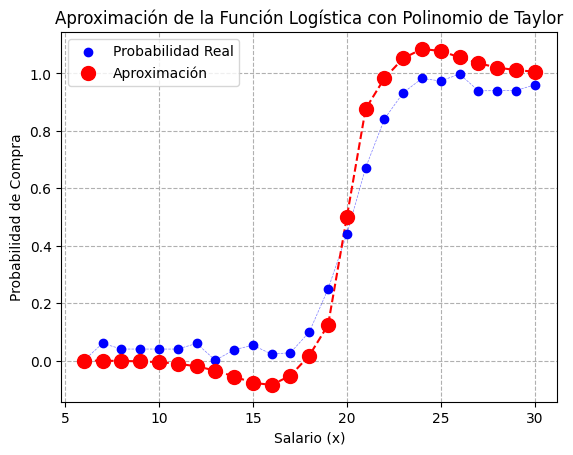

In [14]:
plt.figure()

# Graficar puntos reales
plt.scatter(df['salario en miles'], df['Probabilidad'], color='blue', label='Probabilidad Real', zorder=5)
plt.plot(df['salario en miles'], df['Probabilidad'], color='blue', linestyle='--', linewidth=0.5, alpha=0.5)

# Graficar puntos aproximados
plt.scatter(df['salario en miles'], df['polinomio'], color='red', s=100, label='Aproximación', zorder=5)
plt.plot(df['salario en miles'], df['polinomio'], color='red', linestyle='--', linewidth=1.5)


plt.title('Aproximación de la Función Logística con Polinomio de Taylor')
plt.xlabel('Salario (x)')
plt.ylabel('Probabilidad de Compra')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [33]:
import numpy as np
## Defincición de la función
def f(x):
    return 1 / (1 + np.exp(-(x - s0)))

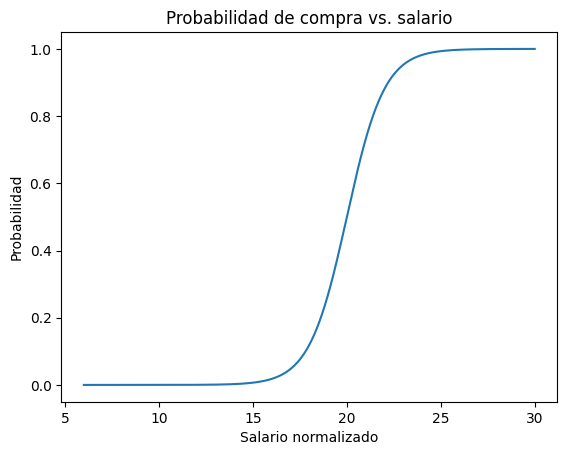

In [34]:
a = df['salario en miles'].min()
b = df['salario en miles'].max()
s0 = 20
N = 1000
x = np.linspace(a, b, N)
plt.plot(x, f(x))
plt.title("Probabilidad de compra vs. salario")
plt.xlabel("Salario normalizado")
plt.ylabel("Probabilidad")
plt.show()

In [35]:
#Definición de la función
def riemann_sum(f, a, b, n, method='left'):
    dx = (b - a) / n
    if method == "left":
        x = np.linspace(a, b-dx, n)
    elif method == "right":
        x = np.linspace(a+dx, b, n)
    else:  # midpoint
        x = np.linspace(a+dx/2, b-dx/2, n)
    return np.sum(f(x) * dx)

In [36]:
for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann izquierda ≈ {riemann_sum(f, a, b, n,'left'):.4f}")
for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann derecha ≈ {riemann_sum(f, a, b, n,'right'):.4f}")
for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann midpoint ≈ {riemann_sum(f, a, b, n,'other'):.4f}")

n= 10 | Suma de Riemann izquierda ≈ 8.8030
n= 50 | Suma de Riemann izquierda ≈ 9.7601
n=100 | Suma de Riemann izquierda ≈ 9.8801
n=500 | Suma de Riemann izquierda ≈ 9.9760
n= 10 | Suma de Riemann derecha ≈ 11.2029
n= 50 | Suma de Riemann derecha ≈ 10.2400
n=100 | Suma de Riemann derecha ≈ 10.1200
n=500 | Suma de Riemann derecha ≈ 10.0240
n= 10 | Suma de Riemann midpoint ≈ 9.9971
n= 50 | Suma de Riemann midpoint ≈ 10.0000
n=100 | Suma de Riemann midpoint ≈ 10.0000
n=500 | Suma de Riemann midpoint ≈ 10.0000


In [ ]:
#Definición de la función
def trapecios_sum(f, a, b, n, method='left'):
    dx = (b - a) / n
    if method == "left":
        x = np.linspace(a, b-dx, n)
    elif method == "right":
        x = np.linspace(a+dx, b, n)
    else:  # midpoint
        x = np.linspace(a+dx/2, b-dx/2, n)
    return np.sum(f(x) * dx)

In [37]:
from scipy.integrate import quad
exacta, _ = quad(f, a, b)
print("Integral exacta:", exacta)

Integral exacta: 10.000044567370846
